# Dataset A
## Madison Chester, Adriana Álvaro, Dafni Tziakouri


In [ ]:
import warnings
warnings.filterwarnings("ignore")
!pip install scikit-optimize
!pip install geneticalgorithm
import os
import nltk
import skopt
import random
import numpy as np
import pandas as pd
import xgboost as xgb
import geneticalgorithm
from sklearn.svm import SVC
from itertools import product
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from nltk.corpus import stopwords
from hyperopt import fmin, tpe, hp
from nltk.stem import WordNetLemmatizer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from skopt.space import Real, Integer, Categorical
from sklearn.linear_model import LogisticRegression
from geneticalgorithm import geneticalgorithm as ga
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
datadir = '/content/gdrive/MyDrive/Kaggle Competition/fakeseverywhere'

train_A = pd.read_csv(os.path.join(datadir, 'train_A_derma.csv'))
test_A = pd.read_csv(os.path.join(datadir, 'test_A_derma.csv'))

# Dataset A

In [ ]:
print('Train A Samples: ', len(train_A))
print('Test A Samples: ', len(test_A))

Train A Samples:  597
Test A Samples:  256


In [ ]:
null_values_by_columns = train_A.isnull().sum()/len(train_A)
null_values_by_columns

Id                       0.000000
Lession                  0.318258
Genetic Propensity       0.324958
Skin X test              0.293132
Skin color               0.296482
Small size               0.308208
Mid size                 0.289782
Large size               0.301508
Mid                      0.293132
Small                    0.308208
Large                    0.318258
Doughnuts consumption    0.000000
Fake/Real                0.000000
dtype: float64

In [ ]:
train_A['Fake/Real'].value_counts(normalize=True)

fake    0.576214
real    0.423786
Name: Fake/Real, dtype: float64

In [ ]:
train_A

,Id,Lession,Genetic Propensity,Skin X test,Skin color,Small size,Mid size,Large size,Mid,Small,Large,Doughnuts consumption,Fake/Real
0,0,1.0,-1.27713,4.0,NaN,0.0,NaN,0.0,1.0,NaN,NaN,1.234125,real
1,1,NaN,-1.84207,3.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN,1.216756,real
2,2,NaN,-1.82290,3.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,1.264342,real
3,3,1.0,-1.36049,3.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,1.126842,real
4,4,NaN,NaN,2.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.198014,fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,592,NaN,-2.16422,NaN,1.0,0.0,NaN,0.0,0.0,NaN,0.0,0.217172,fake
593,593,0.0,NaN,3.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.165209,real
594,594,0.0,-1.03834,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.165564,real
595,595,0.0,NaN,NaN,1.0,1.0,NaN,0.0,0.0,1.0,0.0,1.001725,real


In [ ]:
test_A

,Id,Lession,Genetic Propensity,Skin X test,Skin color,Small size,Mid size,Large size,Mid,Small,Large,Doughnuts consumption
0,0,NaN,NaN,3.0,NaN,0.0,NaN,0.0,0.0,NaN,1.0,0.037404
1,1,NaN,NaN,3.0,1.0,1.0,0.0,0.0,NaN,1.0,0.0,0.052498
2,2,0.0,NaN,4.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.276532
3,3,0.0,NaN,2.0,1.0,NaN,1.0,NaN,1.0,NaN,0.0,0.136218
4,4,1.0,-1.84207,4.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,0.099461
...,...,...,...,...,...,...,...,...,...,...,...,...
251,251,0.0,-2.16422,3.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.276684
252,252,NaN,-2.13480,4.0,1.0,NaN,0.0,1.0,NaN,0.0,1.0,0.084846
253,253,0.0,-2.15173,3.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.060444
254,254,0.0,NaN,3.0,NaN,1.0,NaN,0.0,0.0,1.0,0.0,0.072424


In [ ]:
print(train_A.dtypes)

Id                         int64
Lession                  float64
Genetic Propensity       float64
Skin X test              float64
Skin color               float64
Small size               float64
Mid size                 float64
Large size               float64
Mid                      float64
Small                    float64
Large                    float64
Doughnuts consumption    float64
Fake/Real                 object
dtype: object


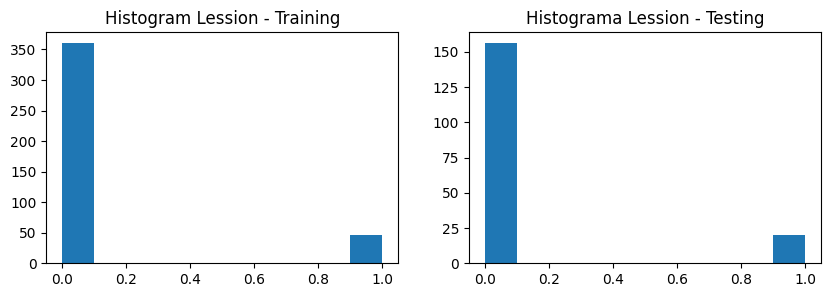

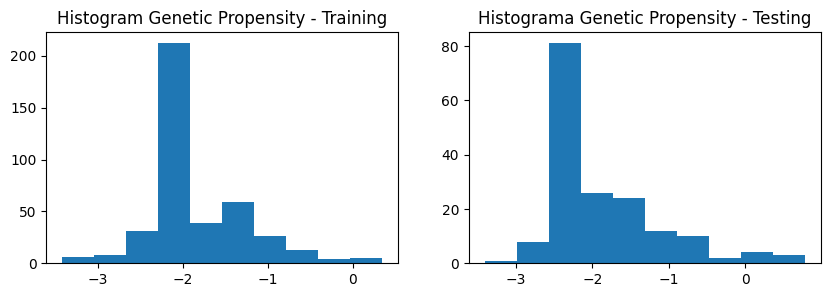

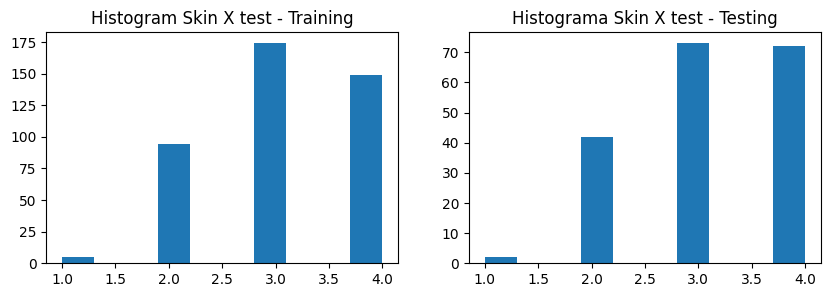

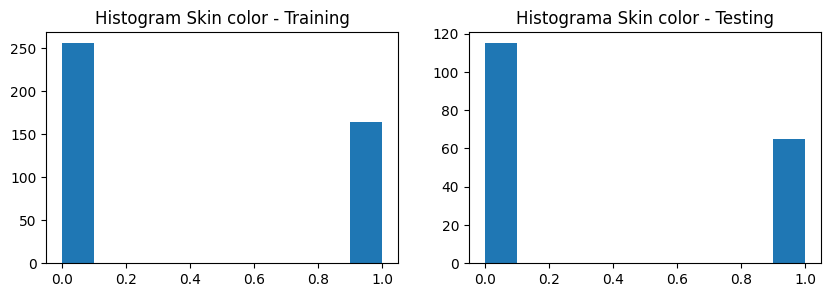

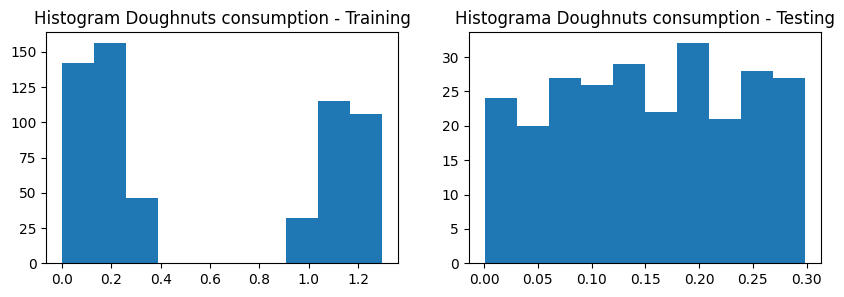

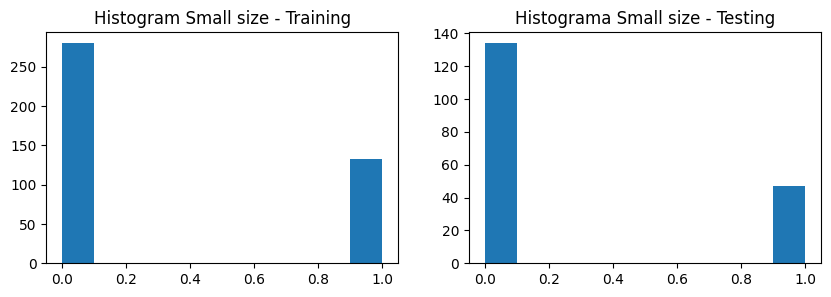

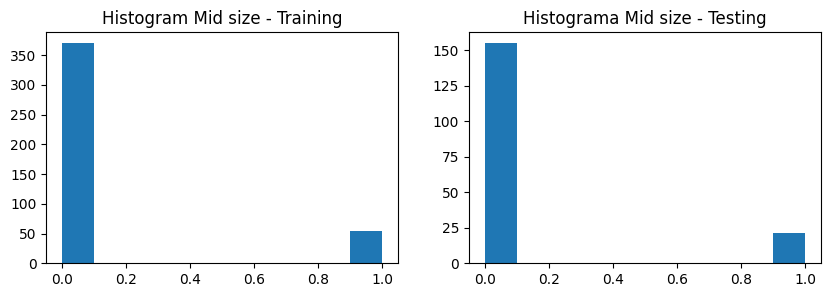

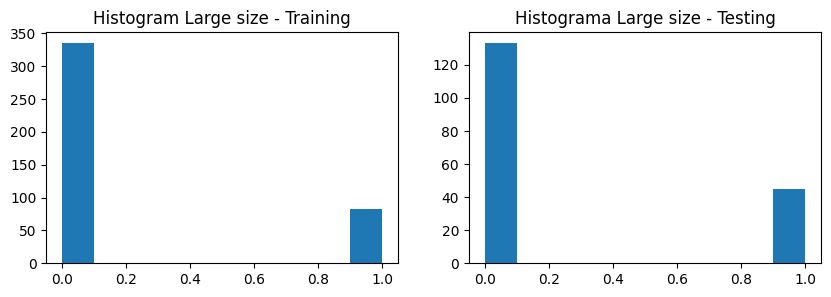

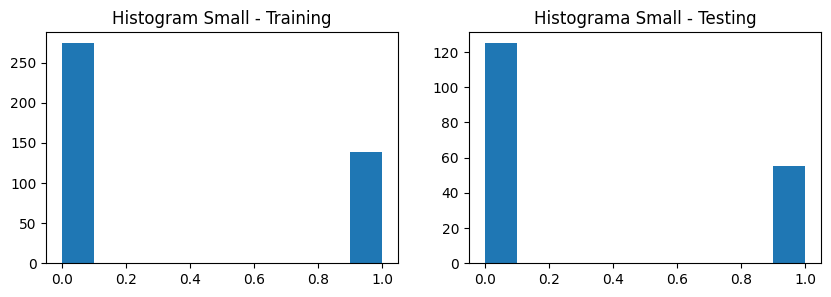

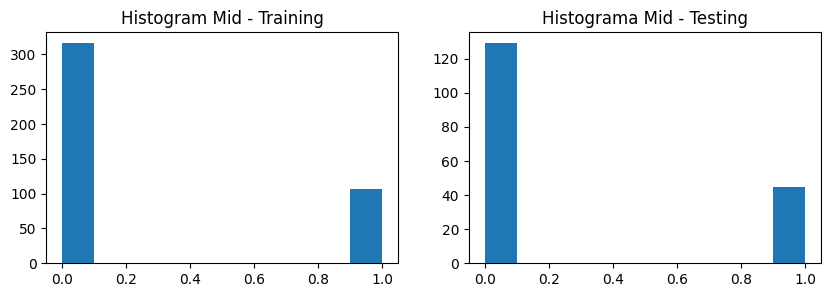

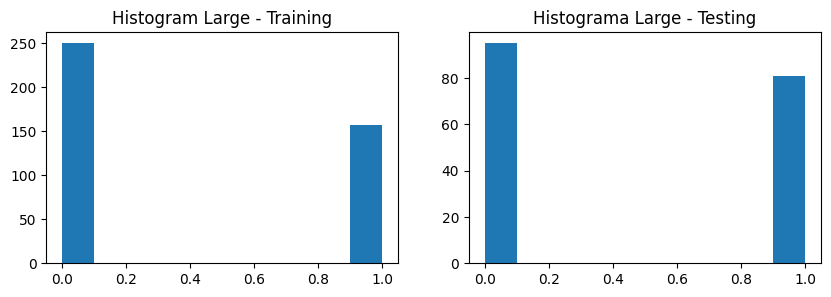

In [ ]:
for col in ['Lession', 'Genetic Propensity', 'Skin X test', 'Skin color', 'Doughnuts consumption', 'Small size', 'Mid size', 'Large size', 'Small', 'Mid', 'Large']:
  plt.figure(figsize=(10, 3))

  plt.subplot(121)
  plt.hist(train_A[col], bins = 10)
  plt.title('Histogram {} - Training'.format(col))

  plt.subplot(122)
  plt.hist(test_A[col], bins = 10)
  plt.title('Histograma {} - Testing'.format(col))

  plt.show()

In [ ]:
np.random.seed(42)

def add_nan_indicator_columns(dataframe):
    # Loop through each column in the DataFrame
    for column in dataframe.columns:
      if column != 'Fake/Real':
        # Create a new binary indicator column for each variable
        nan_indicator_column = f"{column}_is_nan"
        dataframe[nan_indicator_column] = dataframe[column].isna().astype(int)

add_nan_indicator_columns(train_A)
add_nan_indicator_columns(test_A)

def impute_one_hot_with_rules(df, columns):
    for _, row in df.iterrows():
        # Count the number of NaN values and the number of 1s in the row
        nan_count = row[columns].isna().sum()
        one_count = row[columns].sum()

        if one_count == 1:
            # If at least one 1 is present, set all other columns to 0
            for col in columns:
                if row[col] != 1:
                    row[col] = 0
        elif nan_count == 3:
            # If all three values are NaN, randomly choose one for imputation with 1
            idx = np.random.choice(columns, size=1)
            row[idx] = 1
        elif nan_count == 2 and one_count == 0:
            # If two NaNs and no 1s, randomly choose one of the NaNs to be 1
            idx = np.random.choice(columns, size=1)
            row[idx] = 1
        elif nan_count == 1 and one_count == 0:
            # If one NaN and no 1s, set the NaN to 1
            row[row.isna()] = 1

columns = ['Small size', 'Mid size', 'Large size']
impute_one_hot_with_rules(train_A, columns)
impute_one_hot_with_rules(test_A, columns)

columns = ['Small', 'Mid', 'Large']
impute_one_hot_with_rules(train_A, columns)
impute_one_hot_with_rules(test_A, columns)

# Label encoding for the target variable
label_encoding = {'fake': 0, 'real': 1}
train_A['Label'] = train_A['Fake/Real'].map(label_encoding)
train_A.drop(columns=['Fake/Real','Id'], inplace=True)

test_A.drop(columns=['Id'], inplace=True)
test_A['Label'] = 0

# Define categorical and numeric columns
categorical_columns = [
    'Lession',
    'Skin X test',
    'Skin color',
    'Small size',
    'Mid size',
    'Large size',
    'Mid',
    'Small',
    'Large'
]

numeric_columns = ['Genetic Propensity']
# Impute missing values in numeric columns with the median, slightly skewed distribution
for column in numeric_columns:
    train_A[column] = train_A[column].fillna(train_A[column].median())
    test_A[column] = test_A[column].fillna(train_A[column].median())

# Impute missing values in categorical columns with random sampling
for column in categorical_columns:
    train_A[column] = train_A[column].apply(lambda x: random.choice(train_A[column].dropna().tolist()) if pd.isnull(x) else x)
    test_A[column] = test_A[column].apply(lambda x: random.choice(train_A[column].dropna().tolist()) if pd.isnull(x) else x)

# Scale the numeric columns
scaler = StandardScaler()
train_A[numeric_columns] = scaler.fit_transform(train_A[numeric_columns])
test_A[numeric_columns] = scaler.transform(test_A[numeric_columns])

# Convert numpy arrays to data frames following scaling
train_A = pd.DataFrame(train_A, columns=train_A.columns)
test_A = pd.DataFrame(test_A, columns=test_A.columns)

# Remove the 'Label' column from test_A
test_A.drop(columns=['Label'], inplace=True)

# Split training data into train and validation
X_train_A, X_val_A, y_train_A, y_val_A = train_test_split(train_A.drop(columns=['Label', 'Doughnuts consumption']), train_A['Label'], test_size=0.2)

print(X_train_A.shape, X_val_A.shape, y_train_A.shape, y_val_A.shape)

(477, 22) (120, 22) (477,) (120,)


In [ ]:
# Combine training and test data for consistent one-hot encoding
combined_data = pd.concat([X_train_A, X_val_A, test_A.drop(columns=['Doughnuts consumption'])])

# Apply one-hot encoding to the combined data
combined_data = pd.get_dummies(combined_data, columns=categorical_columns, drop_first=True)

# Split the combined data back into training, validation, and test data
X_train_A = combined_data[:len(X_train_A)]
X_val_A = combined_data[len(X_train_A):len(X_train_A) + len(X_val_A)]
X_test_A = combined_data[len(X_train_A) + len(X_val_A):]

print(X_train_A.shape, X_val_A.shape, X_test_A.shape)

(477, 24) (120, 24) (256, 24)


In [ ]:
# Define the classifiers to test
classifiers = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    SVC(),
    LogisticRegression(),
    GaussianNB(),
    KNeighborsClassifier(),
    xgb.XGBClassifier(),
    DecisionTreeClassifier(),
    MLPClassifier(),
    AdaBoostClassifier()
]

# Define the regularization methods
reg_methods = [
    None,  # No regularization
    Ridge(alpha=0.001),
    Lasso(alpha=0.001),
    ElasticNet(alpha=0.001)
]

# Define cross-validation techniques
cv_methods = [
    None,  # No cross-validation
    KFold(n_splits=5, shuffle=True, random_state=42),  # K-fold cross-validation
    StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Stratified K-fold cross-validation
]

# Initialize variables to keep track of the best model and its accuracy
best_model = None
best_reg = None
best_cv = None
best_accuracy = 0.0

# Iterate over classifiers, regularization methods, and cross-validation techniques
for classifier in classifiers:
    classifier_name = type(classifier).__name__

    for reg_method in reg_methods:
        reg_name = "None" if reg_method is None else type(reg_method).__name__

        for cv_method in cv_methods:
            cv_name = "None" if cv_method is None else type(cv_method).__name__

            # Train and evaluate the classifier with the specified settings
            if cv_method:
                scores = cross_val_score(classifier, X_train_A, y_train_A, cv=cv_method, scoring='accuracy')
                accuracy = scores.mean()
            else:
                classifier.fit(X_train_A, y_train_A)
                y_pred_A = classifier.predict(X_val_A)
                accuracy = accuracy_score(y_val_A, y_pred_A)

            # Update the best model and accuracy if a better one is found
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = classifier_name  # Store the best model's name for clarity
                best_reg = reg_name
                best_cv = cv_name

            print(f"Classifier: {classifier_name}, Regularization: {reg_name}, Cross-Validation: {cv_name}, Accuracy: {accuracy}")

print(f"Best model: {best_model}")
print(f"Best Regularization: {best_reg}")
print(f"Best Cross-Validation: {best_cv}")
print(f"Best Accuracy: {best_accuracy}")

Classifier: RandomForestClassifier, Regularization: None, Cross-Validation: None, Accuracy: 0.875
Classifier: RandomForestClassifier, Regularization: None, Cross-Validation: KFold, Accuracy: 0.7737938596491227
Classifier: RandomForestClassifier, Regularization: None, Cross-Validation: StratifiedKFold, Accuracy: 0.7715350877192982
Classifier: RandomForestClassifier, Regularization: Ridge, Cross-Validation: None, Accuracy: 0.8416666666666667
Classifier: RandomForestClassifier, Regularization: Ridge, Cross-Validation: KFold, Accuracy: 0.757017543859649
Classifier: RandomForestClassifier, Regularization: Ridge, Cross-Validation: StratifiedKFold, Accuracy: 0.7652412280701755
Classifier: RandomForestClassifier, Regularization: Lasso, Cross-Validation: None, Accuracy: 0.825
Classifier: RandomForestClassifier, Regularization: Lasso, Cross-Validation: KFold, Accuracy: 0.7633333333333333
Classifier: RandomForestClassifier, Regularization: Lasso, Cross-Validation: StratifiedKFold, Accuracy: 0.765

In [ ]:
def find_best_param_space_for_model(classifier_name):
    best_param_space = {}

    if classifier_name == "RandomForestClassifier":
        best_param_space = {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    elif classifier_name == "GradientBoostingClassifier":
        best_param_space = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5],
            'min_samples_split': [2, 3, 4],
            'subsample': [0.8, 0.9, 1.0]
        }
    elif classifier_name == "SVC":
        best_param_space = {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf'],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
            'degree': [2, 3, 4]
        }
    elif classifier_name == "LogisticRegression":
        best_param_space = {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        }
    elif classifier_name == "GaussianNB":
        best_param_space = {}
    elif classifier_name == "KNeighborsClassifier":
        best_param_space = {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    elif classifier_name == "XGBClassifier":
        best_param_space = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 4, 5],
            'subsample': [0.8, 0.9, 1.0]
        }
    elif classifier_name == "DecisionTreeClassifier":
        best_param_space = {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'criterion': ['gini', 'entropy']
        }
    elif classifier_name == "MLPClassifier":
        best_param_space = {
            'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)],
            'activation': ['identity', 'logistic', 'tanh', 'relu'],
            'alpha': [0.0001, 0.001, 0.01],
            'solver': ['lbfgs', 'sgd', 'adam']
        }
    elif classifier_name == "AdaBoostClassifier":
        best_param_space = {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2]
        }

    return best_param_space

best_param_space = find_best_param_space_for_model(best_model)
best_param_space

{'n_estimators': [10, 50, 100],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
# Create an instance of the best model
best_classifier = None

reg_params = {
    "None": {},
    "Ridge": {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    "Lasso": {'alpha': [0.001, 0.01, 0.1, 1, 10]},
    "ElasticNet": {'alpha': [0.001, 0.01, 0.1, 1, 10]}
}

cv_methods_mapping = {
    "None": None,
    "KFold": KFold(n_splits=5, shuffle=True, random_state=42),
    "StratifiedKFold": StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
}

if best_model == "RandomForestClassifier":
    best_classifier = RandomForestClassifier()
elif best_model == "GradientBoostingClassifier":
    best_classifier = GradientBoostingClassifier()
elif best_model == "SVC":
    best_classifier = SVC()
elif best_model == "LogisticRegression":
    best_classifier = LogisticRegression()
elif best_model == "GaussianNB":
    best_classifier = GaussianNB()
elif best_model == "KNeighborsClassifier":
    best_classifier = KNeighborsClassifier()
elif best_model == "XGBClassifier":
    best_classifier = xgb.XGBClassifier()
elif best_model == "DecisionTreeClassifier":
    best_classifier = DecisionTreeClassifier()
elif best_model == "MLPClassifier":
    best_classifier = MLPClassifier()
elif best_model == "AdaBoostClassifier":
    best_classifier = AdaBoostClassifier()

# Create a grid search using the best classifier and parameter space
grid_search = GridSearchCV(estimator=best_classifier, param_grid=best_param_space, scoring='accuracy', cv=cv_methods_mapping[best_cv])

# Fit the model with the best hyperparameters
grid_search.fit(X_train_A, y_train_A)

# Get the best model with the tuned hyperparameters
best_model_tuned = grid_search.best_estimator_

# Add regularization hyperparameters to the best model if applicable
if best_reg != "None":
    # Check if the classifier supports regularization hyperparameters
    if best_model in reg_params:
        reg_params_for_best_model = reg_params[best_reg]
        best_model_tuned.set_params(**reg_params_for_best_model)

# Fit the best model on training data
best_model_tuned.fit(X_train_A, y_train_A)

# Predict on the validation data
y_pred_A = best_model_tuned.predict(X_val_A)

# Calculate accuracy on the validation data
accuracy = accuracy_score(y_val_A, y_pred_A)

# Generate a classification report
classification_rep = classification_report(y_val_A, y_pred_A)

print(f"Best model after hyperparameter tuning: {best_model}")
print(f"Best Regularization: {best_reg}")
print(f"Best Cross-Validation: {best_cv}")
print(f"Best Accuracy after hyperparameter tuning: {accuracy}")
print("Classification Report:\n", classification_rep)

Best model after hyperparameter tuning: RandomForestClassifier
Best Regularization: None
Best Cross-Validation: None
Best Accuracy after hyperparameter tuning: 0.8916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90        66
           1       0.89      0.87      0.88        54

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120



In [ ]:
# Concatenate X_train_A and X_val_A
X_train_val_A = pd.concat([X_train_A, X_val_A], axis=0)

# Concatenate y_train_A and y_val_A
y_train_val_A = pd.concat([y_train_A, y_val_A], axis=0)

# Retrain the best model on the combined dataset (all available data)
best_model_tuned.fit(X_train_val_A.values, y_train_val_A.values)

best_model_tuned

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50)

# Save model

In [ ]:
# save the model
from datetime import date
import pickle
import uuid

classifier = 'rf'
date = str(date.today())
acc = str(accuracy)[:6]
id = str(uuid.uuid4())
model_name = '_'.join([classifier, date, acc, id]) +  '.pickle'

with open('/content/gdrive/MyDrive/Kaggle Competition/models_A/' + model_name, 'wb') as f:
   pickle.dump(best_model_tuned, f)

# Doing the test predictions

In [ ]:
# Make predictions on test data
test_predictions = best_model_tuned.predict(X_test_A.values)

# Preparing prediction csv for A

In [ ]:
y_pred_test_A_df = pd.DataFrame()
y_pred_test_A_df['Prediction'] = test_predictions

reverse_label_encoding = {0:'fake', 1: 'real'}
y_pred_test_A_df['Prediction'] = y_pred_test_A_df['Prediction'].map(reverse_label_encoding)
y_pred_test_A_df['Id'] = y_pred_test_A_df.index
y_pred_test_A_df = y_pred_test_A_df[['Id', 'Prediction']]


file_path = os.path.join('/content/gdrive/MyDrive/Kaggle Competition', 'y_pred_test_A.csv')
y_pred_test_A_df.to_csv(file_path, index=False)


In [ ]:
# read the csv with the B predictions
file_path = '/content/gdrive/MyDrive/Kaggle Competition/y_pred_test_B.csv'
y_pred_test_B_df = pd.read_csv(file_path)

y_pred_test_B_df

# read the csv with the B predictions
# import pandas as pd
# file_path = '/content/gdrive/MyDrive/Kaggle Competition/y_pred.csv'
# y_pred = pd.read_csv(file_path)

# y_pred_test_B_df = y_pred[256:]
# y_pred_test_B_df

,Id,Prediction
0,0,real
1,1,real
2,2,real
3,3,fake
4,4,real
...,...,...
1495,1495,real
1496,1496,real
1497,1497,real
1498,1498,real


In [ ]:
# concatenate both predictions
y_pred= pd.DataFrame()

y_pred['Prediction'] = np.concatenate([y_pred_test_A_df['Prediction'].values, y_pred_test_B_df['Prediction'].values])
y_pred['Id'] = y_pred.index
y_pred

,Prediction,Id
0,fake,0
1,real,1
2,fake,2
3,fake,3
4,real,4
...,...,...
1751,real,1751
1752,real,1752
1753,real,1753
1754,real,1754


In [ ]:
file_path = os.path.join('/content/gdrive/MyDrive/Kaggle Competition', 'y_pred.csv')
y_pred.to_csv(file_path, index=False)
# y_pred = pd.read_csv(file_path)

In [ ]:
y_pred

,Prediction,Id
0,fake,0
1,real,1
2,fake,2
3,fake,3
4,real,4
...,...,...
1751,real,1751
1752,real,1752
1753,real,1753
1754,real,1754


In [ ]:
# to test only the accuracy for dataset A predictions

nulls = pd.DataFrame({'Id': range(256, 1756), 'Prediction': [None] * 1500})
y_prueba = y_pred_test_A_df.copy()

# concatenting null dataframe with predictions for A
y_prueba = pd.concat([y_prueba, nulls], ignore_index=True)
y_prueba.to_csv('/content/gdrive/MyDrive/Kaggle Competition/y_prueba.csv', index=False)

y_prueba

,Id,Prediction
0,0,fake
1,1,real
2,2,fake
3,3,fake
4,4,real
...,...,...
1751,1751,None
1752,1752,None
1753,1753,None
1754,1754,None
